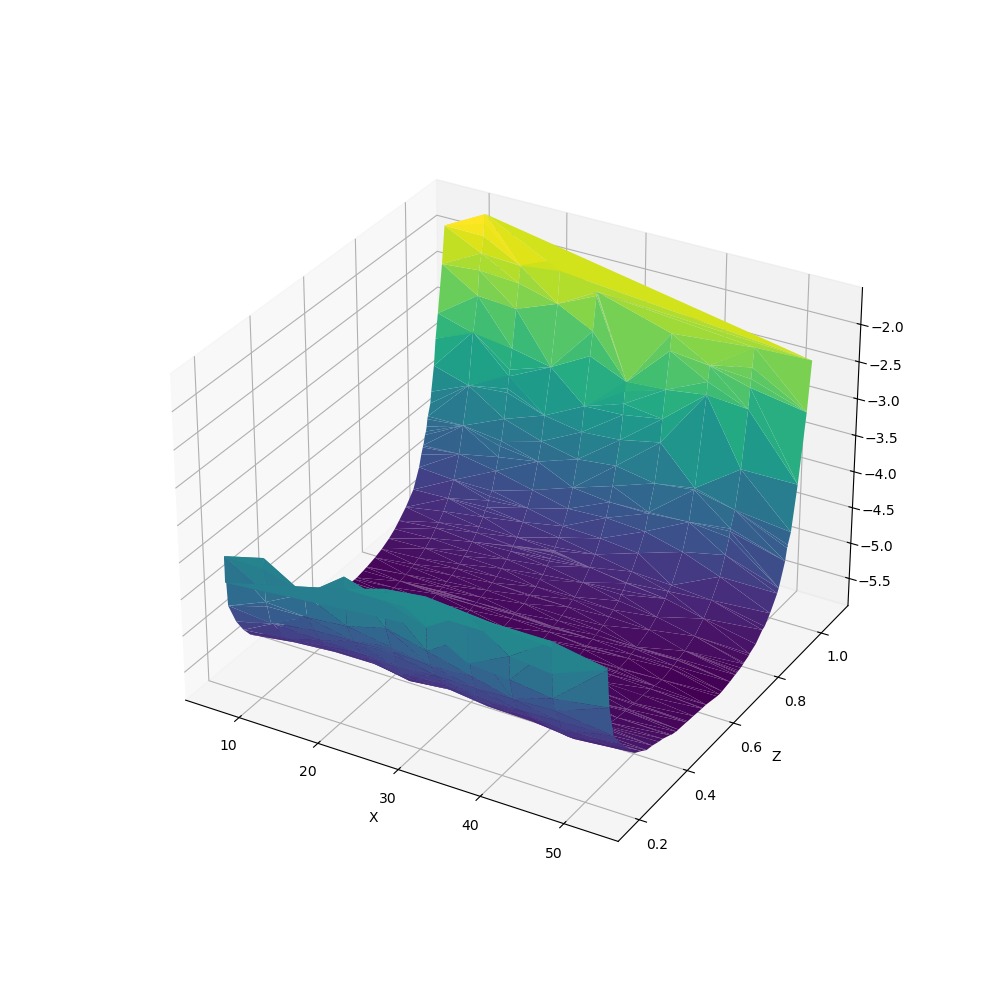

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget 
#import values
filename="data/layer_mid_B.txt"

with open(filename, 'r') as file:
    lines = [line.strip() for line in file if not line.startswith('#')]

# Initialize empty lists for each column
X = []
Z = []
B = []

# Iterate through each line and split the values
for line in lines:
    # Split the line into three values using space as the delimiter
    values = line.split()
    
    # Convert each value to the appropriate data type (e.g., float)
    val1, _,_,val2, val3 = map(float, values)
    
    # Append the values to the respective columns
    X.append(val1)
    Z.append(val3)
    B.append(val2)

df = pd.DataFrame({"x":X,"b":B,"z":Z})

# Creazione del grafico bidimensionale
# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df['x'], df['z'], df['b'], cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Z')

plt.show()